In [1]:
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sorts
import pyant
import pyorb

print(f'sorts=={sorts.__version__}')
print(f'pyorb=={pyorb.__version__}')
print(f'pyant=={pyant.__version__}')
plt.style.use('dark_background')

sorts==4.0.0
pyorb==0.4.4
pyant==0.8.4


In [2]:
radar = sorts.radars.eiscat_uhf
radar.tx[0].beam.sph_point(azimuth=0, elevation=90)

In [3]:
def gain_path_function(x0, x1):
    x0.shape = (2,1)
    x1.shape = (2,1)
    def func(t):
        t_ = 1 - t
        return x0*t_[None, :] + x1*t[None, :]
    return func

In [4]:
pth_f = gain_path_function(
    np.array([0.1, -0.15]), 
    np.array([-0.15, 0.15]),
)

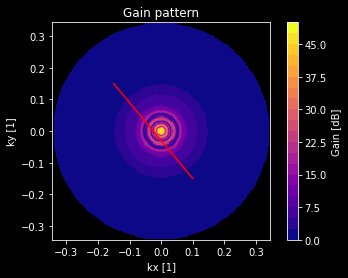

In [5]:
x = np.linspace(0, 1, 100)
pth = pth_f(x)
pth = np.vstack([pth, np.sqrt(1 - np.linalg.norm(pth, axis=0))])
pyant.plotting.gain_heatmap(radar.tx[0].beam, min_elevation=70.0)
plt.plot(pth[0, :], pth[1, :], '-r')

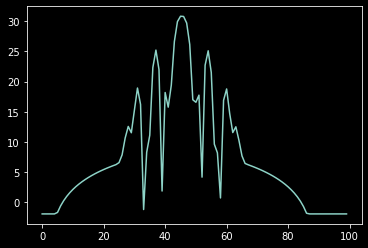

In [6]:
G_pth = radar.tx[0].beam.gain(pth)
plt.plot(10*np.log10(G_pth))

In [7]:
data_path = Path('/home/danielk/data/spade/beamparks/uhf/')
data_path /= '2021.11.23/leo_bpark_2.1u_NO@uhf_extended/20211123_12/uhf_20211123_120016_600000/'
data_path /= 'uhf_20211123_120016_600000.hlist'

In [8]:
names=[f'{x}' for x in range(20)]
names[8] = 'r'
names[10] = 'SNR'
names[14] = 't'
names[9] = 'v'

In [9]:
data = pd.read_csv(
    data_path, 
    sep=r'[ ]+', 
    comment='%', 
    skip_blank_lines=True, 
    names=names, 
    skiprows=45,
    engine='python',
)
data['SNR'] = data['SNR']**2
data['t'] = (data['t'] - np.min(data['t']))*1e-6
data['r'] = data['r']*1e3

In [10]:
data

,0,1,2,3,4,5,6,7,r,v,SNR,11,12,13,t,15,16,17,18,19
0,hit,2021,11,23,12,0,16,600000,928607.0,263.943,17.164449,-1.0,-1.0,2,0.0,600000,0,20.57,-14.950,0
1,hit,2021,11,23,12,0,16,800000,930856.0,9693.008,14.784025,-1.0,-1.0,2,0.2,800000,0,20.58,-14.954,0
2,hit,2021,11,23,12,0,17,0,931155.0,-7766.619,12.475024,-1.0,-1.0,2,0.4,1000000,0,20.58,-14.961,0
3,hit,2021,11,23,12,0,17,200000,930706.0,8192.079,14.938225,-1.0,-1.0,2,0.6,1200000,0,20.58,-14.926,0
4,hit,2021,11,23,12,0,17,400000,930856.0,2353.819,15.594601,-1.0,-1.0,2,0.8,1400000,0,20.58,-14.946,0
5,hit,2021,11,23,12,0,17,600000,929057.0,319.095,41.990400,-1.0,-1.0,2,1.0,1600000,0,20.58,-14.941,0
6,hit,2021,11,23,12,0,17,800000,929357.0,340.762,255.008961,-1.0,-1.0,2,1.2,1800000,0,20.57,-14.936,0
7,hit,2021,11,23,12,0,18,0,929507.0,340.762,989.417025,-1.0,-1.0,2,1.4,2000000,0,20.57,-14.910,0
8,hit,2021,11,23,12,0,18,200000,929507.0,362.429,3195.188676,-1.0,-1.0,2,1.6,2200000,0,20.57,-14.989,0
9,hit,2021,11,23,12,0,18,400000,929656.0,362.429,6405.761296,-1.0,-1.0,2,1.8,2400000,0,20.57,-14.961,0


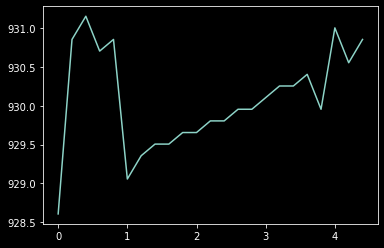

In [11]:
plt.plot(data['t'], data['r']*1e-3)

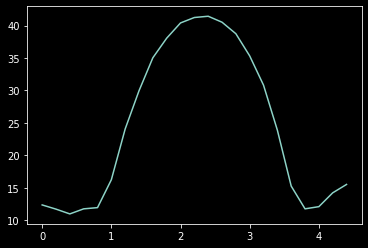

In [12]:
plt.plot(data['t'], 10*np.log10(data['SNR']))

In [13]:
#deterine the line length by assuming velocity
vel = 7.5e3 #m/s
mu_r = np.mean(data['r'].values)
#How long is this arch length radians?
arc = vel*np.max(data['t'])/mu_r
yp = np.sin(arc*0.5)
xp = 0

In [14]:
pth_f = gain_path_function(
    np.array([xp, yp]), 
    np.array([xp, -yp]),
)

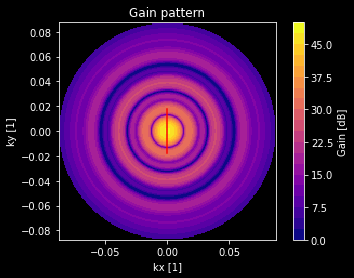

In [15]:
x = np.linspace(0, 1, 100)
pth = pth_f(x)
pyant.plotting.gain_heatmap(radar.tx[0].beam, min_elevation=85.0)
plt.plot(pth[0, :], pth[1, :], '-r')

In [16]:
x = data['t'].values.copy()/np.max(data['t'])
pth = pth_f(x)
pth = np.vstack([pth, np.sqrt(1 - np.linalg.norm(pth, axis=0))])
G_pth = radar.tx[0].beam.gain(pth)
G_pth_db = 10*np.log10(G_pth)

In [17]:
diam = sorts.signals.hard_target_diameter(
    G_pth, 
    G_pth,
    radar.tx[0].wavelength,
    radar.tx[0].power,
    data['r'], 
    data['r'],
    data['SNR'], 
    bandwidth=radar.tx[0].coh_int_bandwidth,
    rx_noise_temp=radar.rx[0].noise,
    radar_albedo=1.0,
)

In [18]:
diam[G_pth_db < 10] = np.nan

Text(0, 0.5, 'Diameter [cm]')

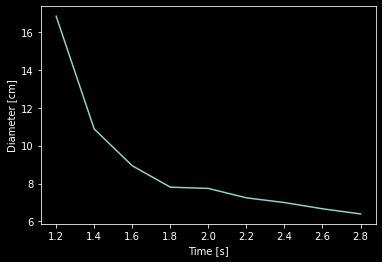

In [25]:
inds = np.logical_and(data['t'].values > 1, data['t'].values < 3)
plt.plot(data['t'][inds], diam[inds]*1e2)
plt.xlabel('Time [s]')
plt.ylabel('Diameter [cm]')

Text(0, 0.5, 'Diameter [cm]')

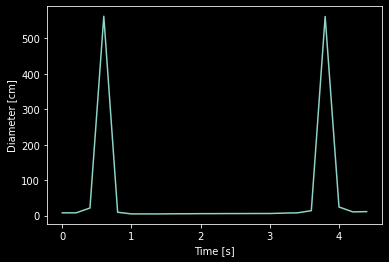

In [19]:
plt.plot(data['t'], diam*1e2)
plt.xlabel('Time [s]')
plt.ylabel('Diameter [cm]')

Text(0, 0.5, 'Normalized SNR [1]')

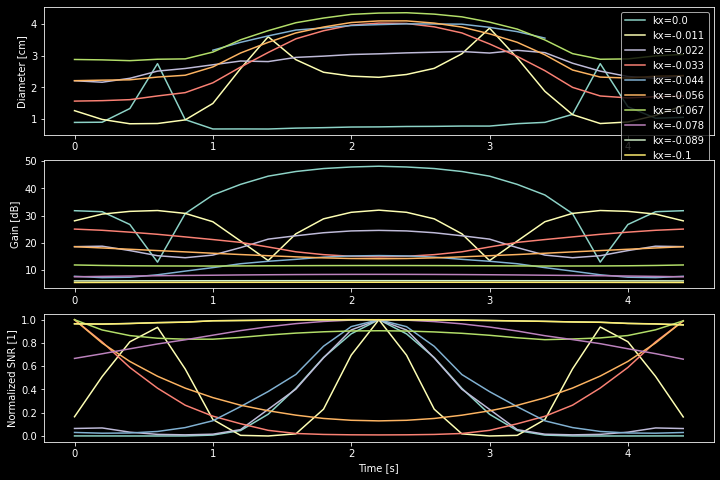

In [20]:
fig, axes = plt.subplots(3,1, figsize=(12,8))
for xp in np.linspace(0,-0.1,10):
    pth_f = gain_path_function(
        np.array([xp, yp]), 
        np.array([xp, -yp]),
    )
    x = data['t'].values.copy()/np.max(data['t'])
    pth = pth_f(x)
    pth = np.vstack([pth, np.sqrt(1 - np.linalg.norm(pth, axis=0))])
    G_pth = radar.tx[0].beam.gain(pth)
    G_pth_db = 10*np.log10(G_pth)
    diam = sorts.signals.hard_target_diameter(
        G_pth, 
        G_pth,
        radar.tx[0].wavelength,
        radar.tx[0].power,
        data['r'], 
        data['r'],
        data['SNR'], 
        bandwidth=radar.tx[0].coh_int_bandwidth,
        rx_noise_temp=radar.rx[0].noise,
        radar_albedo=1.0,
    )
    SNR_sim = sorts.signals.hard_target_snr(
        G_pth, 
        G_pth,
        radar.tx[0].wavelength,
        radar.tx[0].power,
        data['r'], 
        data['r'],
        diameter=1, 
        bandwidth=radar.tx[0].coh_int_bandwidth,
        rx_noise_temp=radar.rx[0].noise,
        radar_albedo=1.0,
    )
    diam[G_pth_db < 10] = np.nan
    
    axes[0].plot(data['t'], np.log10(diam*1e2), label=f'kx={xp:.2}')
    axes[1].plot(data['t'], G_pth_db)
    axes[2].plot(data['t'], SNR_sim/np.max(SNR_sim))
axes[0].legend()
axes[2].set_xlabel('Time [s]')
axes[0].set_ylabel('Diameter [cm]')
axes[1].set_ylabel('Gain [dB]')
axes[2].set_ylabel('Normalized SNR [1]')

/home/danielk/tmp/ipykernel_1560938/1364321598.py:58: RuntimeWarning: invalid value encountered in double_scalars
  match = np.sum(xsn*ysn)/norm_coef
/home/danielk/venvs/SORTS_applications/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0, 0.5, 'Normalized SNR [dB]')

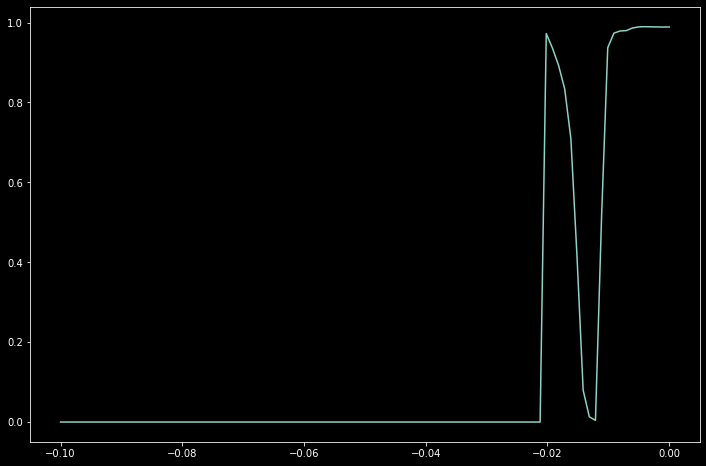

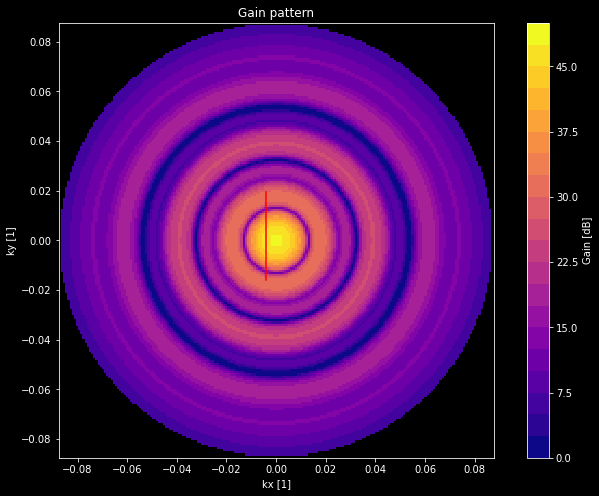

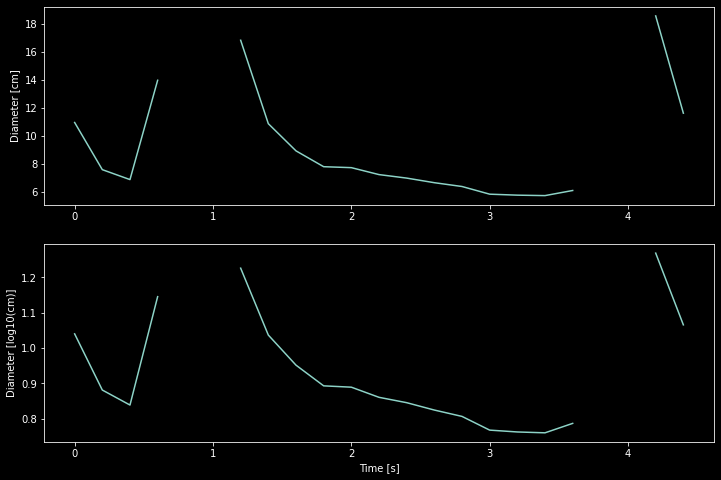

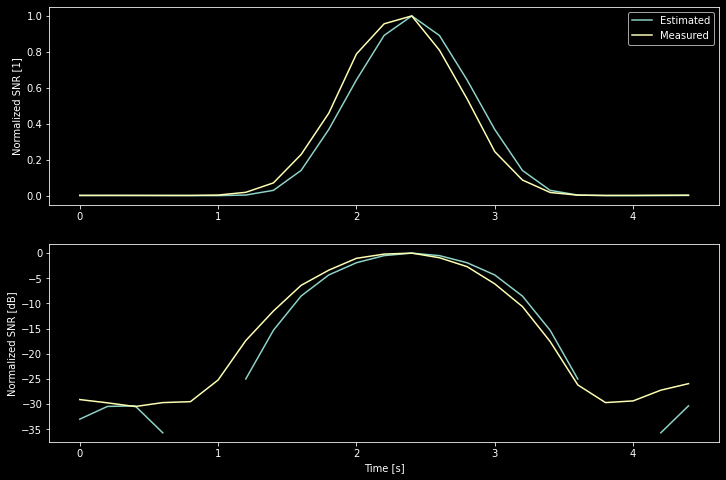

In [44]:
diams = []
SNR_sims = []
pths = []
matches = []
xps = np.linspace(0,-0.1,100)
#figure out offset 
x = data['t'].values.copy()/np.max(data['t'])
#peak snr
snr_max = np.argmax(data['SNR'].values)
x_shift = x[snr_max] - 0.5 #offset from 0.5 gives yp offset

#yp_off = -0.001
yp_off = 0
for xp in xps:
    pth_f = gain_path_function(
        np.array([xp, yp+yp_off]), 
        np.array([xp, -yp+yp_off]),
    )
    pth = pth_f(x - x_shift)
    pth = np.vstack([pth, np.sqrt(1 - np.linalg.norm(pth, axis=0))])
    pths.append(pth)
    G_pth = radar.tx[0].beam.gain(pth)
    G_pth_db = 10*np.log10(G_pth)
    diam = sorts.signals.hard_target_diameter(
        G_pth, 
        G_pth,
        radar.tx[0].wavelength,
        radar.tx[0].power,
        data['r'], 
        data['r'],
        data['SNR'], 
        bandwidth=radar.tx[0].coh_int_bandwidth,
        rx_noise_temp=radar.rx[0].noise,
        radar_albedo=1.0,
    )
    SNR_sim = sorts.signals.hard_target_snr(
        G_pth, 
        G_pth,
        radar.tx[0].wavelength,
        radar.tx[0].power,
        data['r'], 
        data['r'],
        diameter=1, 
        bandwidth=radar.tx[0].coh_int_bandwidth,
        rx_noise_temp=radar.rx[0].noise,
        radar_albedo=1.0,
    )
    diam[G_pth_db < 28] = np.nan
    SNR_sim[G_pth_db < 28] = 0
    diams.append(diam)
    SNR_sims.append(SNR_sim)
    
    xsn = data['SNR'].values.copy()
    #x = 10*np.log10(x)
    ysn = SNR_sim.copy()
    #y = 10*np.log10(y)
    norm_coef = np.sqrt(np.sum(xsn**2))*np.sqrt(np.sum(ysn**2))
    match = np.sum(xsn*ysn)/norm_coef
    if np.sum(SNR_sim) < 0.001:
        matches.append(0)
    else:
        matches.append(match)
    

matches = np.array(matches)

best_ind = np.argmax(matches)
diam = diams[best_ind]
SNR_sim = SNR_sims[best_ind]
xp = xps[best_ind]
pth = pths[best_ind]

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(xps, matches)

fig, ax = plt.subplots(figsize=(12,8))
pyant.plotting.gain_heatmap(radar.tx[0].beam, min_elevation=85.0, ax=ax)
ax.plot(pth[0, :], pth[1, :], '-r')

fig, axes = plt.subplots(2,1, figsize=(12,8))
axes[0].plot(data['t'], diam*1e2)
axes[0].set_ylabel('Diameter [cm]')
axes[1].plot(data['t'], np.log10(diam*1e2))
axes[1].set_ylabel('Diameter [log10(cm)]')
axes[1].set_xlabel('Time [s]')

fig, axes = plt.subplots(2,1, figsize=(12,8))
axes[0].plot(data['t'], SNR_sim/np.max(SNR_sim), label='Estimated')
axes[0].plot(data['t'], data['SNR']/np.max(data['SNR']), label='Measured')
axes[1].plot(data['t'], 10*np.log10(SNR_sim/np.max(SNR_sim)), label='Estimated')
axes[1].plot(data['t'], 10*np.log10(data['SNR']/np.max(data['SNR'])), label='Measured')
axes[0].legend()
axes[1].set_xlabel('Time [s]')
axes[0].set_ylabel('Normalized SNR [1]')
axes[1].set_ylabel('Normalized SNR [dB]')

Text(0, 0.5, 'Normalized SNR [dB]')

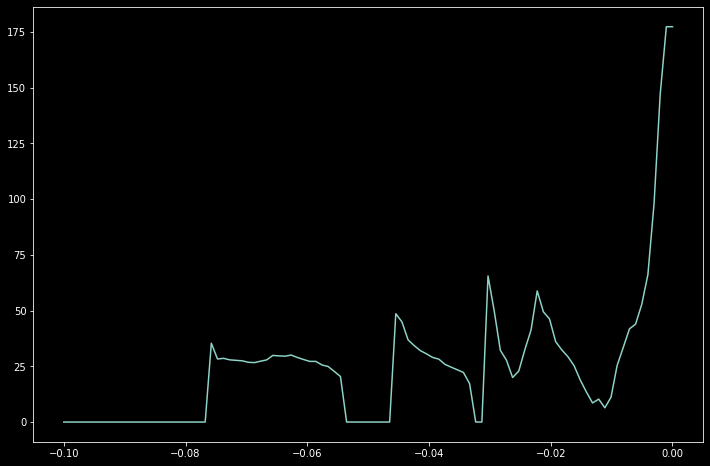

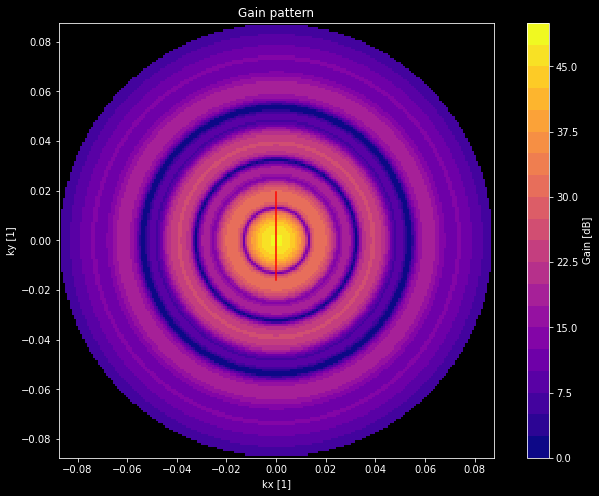

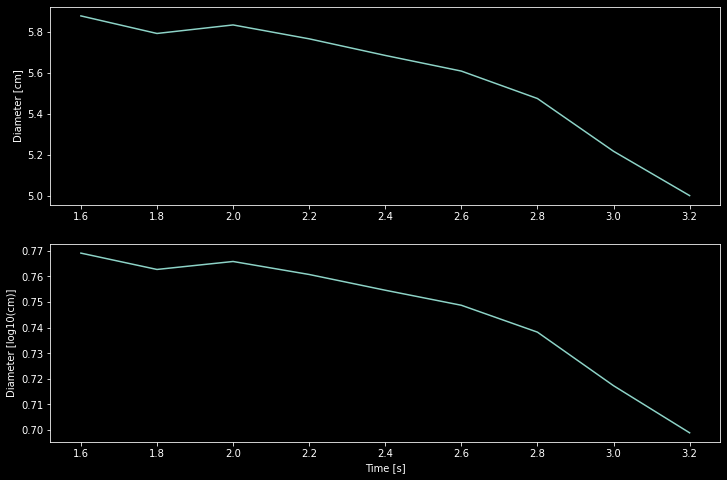

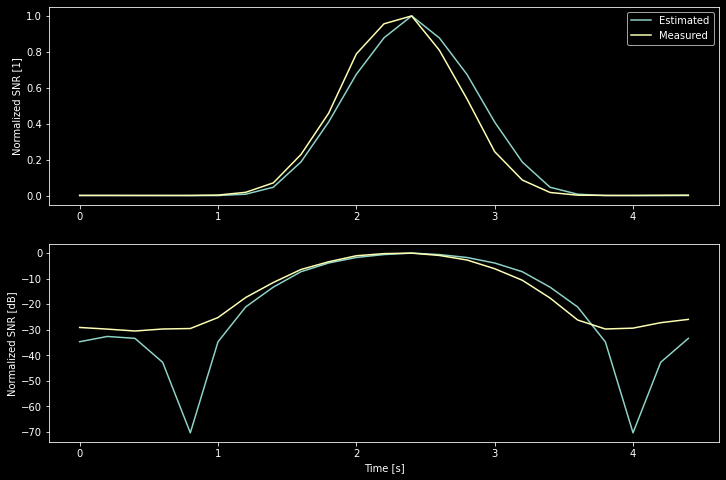

In [43]:
diams = []
SNR_sims = []
pths = []
matches = []
xps = np.linspace(0,-0.1,100)
#figure out offset 
x = data['t'].values.copy()/np.max(data['t'])
#peak snr
snr_max = np.argmax(data['SNR'].values)
x_shift = x[snr_max] - 0.5 #offset from 0.5 gives yp offset

#yp_off = -0.001
yp_off = 0
for xp in xps:
    pth_f = gain_path_function(
        np.array([xp, yp+yp_off]), 
        np.array([xp, -yp+yp_off]),
    )
    pth = pth_f(x - x_shift)
    pth = np.vstack([pth, np.sqrt(1 - np.linalg.norm(pth, axis=0))])
    pths.append(pth)
    G_pth = radar.tx[0].beam.gain(pth)
    G_pth_db = 10*np.log10(G_pth)
    diam = sorts.signals.hard_target_diameter(
        G_pth, 
        G_pth,
        radar.tx[0].wavelength,
        radar.tx[0].power,
        data['r'], 
        data['r'],
        data['SNR'], 
        bandwidth=radar.tx[0].coh_int_bandwidth,
        rx_noise_temp=radar.rx[0].noise,
        radar_albedo=1.0,
    )
    SNR_sim = sorts.signals.hard_target_snr(
        G_pth, 
        G_pth,
        radar.tx[0].wavelength,
        radar.tx[0].power,
        data['r'], 
        data['r'],
        diameter=1, 
        bandwidth=radar.tx[0].coh_int_bandwidth,
        rx_noise_temp=radar.rx[0].noise,
        radar_albedo=1.0,
    )
    diam[G_pth_db < 10] = np.nan
    SNR_sim[G_pth_db < 10] = 0
    diams.append(diam)
    SNR_sims.append(SNR_sim)
    inds = np.logical_not(np.isnan(diam))
    #only close to snr max?
    inds = np.logical_and(inds, np.abs(data['t'].values - data['t'].values[snr_max]) < 1.0)
    inds = np.where(inds)[0]
    if len(inds) < 5:
        match = 0
    else:
        match = 1.0/np.std(diam[inds]/np.sum(diam[inds]))
    matches.append(match)
    

matches = np.array(matches)

best_ind = np.argmax(matches)
diam = diams[best_ind]
SNR_sim = SNR_sims[best_ind]
xp = xps[best_ind]
pth = pths[best_ind]

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(xps, matches)

fig, ax = plt.subplots(figsize=(12,8))
pyant.plotting.gain_heatmap(radar.tx[0].beam, min_elevation=85.0, ax=ax)
ax.plot(pth[0, :], pth[1, :], '-r')

inds = np.abs(data['t'].values - data['t'].values[snr_max]) < 1.0

fig, axes = plt.subplots(2,1, figsize=(12,8))
axes[0].plot(data['t'][inds], diam[inds]*1e2)
axes[0].set_ylabel('Diameter [cm]')
axes[1].plot(data['t'][inds], np.log10(diam[inds]*1e2))
axes[1].set_ylabel('Diameter [log10(cm)]')
axes[1].set_xlabel('Time [s]')

fig, axes = plt.subplots(2,1, figsize=(12,8))
axes[0].plot(data['t'], SNR_sim/np.max(SNR_sim), label='Estimated')
axes[0].plot(data['t'], data['SNR']/np.max(data['SNR']), label='Measured')
axes[1].plot(data['t'], 10*np.log10(SNR_sim/np.max(SNR_sim)), label='Estimated')
axes[1].plot(data['t'], 10*np.log10(data['SNR']/np.max(data['SNR'])), label='Measured')
axes[0].legend()
axes[1].set_xlabel('Time [s]')
axes[0].set_ylabel('Normalized SNR [1]')
axes[1].set_ylabel('Normalized SNR [dB]')